1. data reader
2. normal type cnn
3. tf.layers cnn
4. tensorboard
5. learning rate
6. data analysis
7. error analysis

In [ ]:
import gzip, pickle
with gzip.open(r'/Users/BohaoHuang/Documents/Research/python-mnist/mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()

In [ ]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
# split into train and validation sets
train_images = train[0].astype(np.float64)
train_labels = train[1]
valid_images = val[0].astype(np.float64)
valid_labels = val[1]
test_images = test[0].astype(np.float64)
test_labels = test[1]
# create the training datasets
dx_train = tf.data.Dataset.from_tensor_slices(train_images)
dx_valid = tf.data.Dataset.from_tensor_slices(valid_images)
dx_test = tf.data.Dataset.from_tensor_slices(test_images)
# apply a one-hot transformation to each label for use in the neural network
dy_train = tf.data.Dataset.from_tensor_slices(train_labels).map(lambda z: tf.one_hot(z, 10))
dy_valid = tf.data.Dataset.from_tensor_slices(valid_labels).map(lambda z: tf.one_hot(z, 10))
dy_test = tf.data.Dataset.from_tensor_slices(test_labels).map(lambda z: tf.one_hot(z, 10))
# zip the x and y training data together and shuffle, batch etc.
train_dataset = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(5000).repeat().batch(50)
valid_dataset = tf.data.Dataset.zip((dx_valid, dy_valid)).shuffle(5000).batch(50)
test_dataset = tf.data.Dataset.zip((dx_test, dy_test)).batch(50)

# create general iterator
iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                           train_dataset.output_shapes)
img, lbl = iterator.get_next()
# make datasets that we can initialize separately, but using the same structure via the common iterator
training_init_op = iterator.make_initializer(train_dataset)
validation_init_op = iterator.make_initializer(valid_dataset)
test_init_op = iterator.make_initializer(test_dataset)

In [ ]:
print(img.shape)

In [ ]:
conv1_1_w = tf.get_variable(name='conv1_1_w', shape=[3, 3, 1, 8], dtype=tf.float64)
conv1_1_b = tf.get_variable(name='conv1_1_b', shape=[8], dtype=tf.float64)
conv1_2_w = tf.get_variable(name='conv1_2_w', shape=[3, 3, 8, 8], dtype=tf.float64)
conv1_2_b = tf.get_variable(name='conv1_2_b', shape=[8], dtype=tf.float64)
conv2_1_w = tf.get_variable(name='conv2_1_w', shape=[3, 3, 8, 16], dtype=tf.float64)
conv2_1_b = tf.get_variable(name='conv2_1_b', shape=[16], dtype=tf.float64)
conv2_2_w = tf.get_variable(name='conv2_2_w', shape=[3, 3, 16, 16], dtype=tf.float64)
conv2_2_b = tf.get_variable(name='conv2_2_b', shape=[16], dtype=tf.float64)
conv3_1_w = tf.get_variable(name='conv3_1_w', shape=[3, 3, 16, 32], dtype=tf.float64)
conv3_1_b = tf.get_variable(name='conv3_1_b', shape=[32], dtype=tf.float64)
conv3_2_w = tf.get_variable(name='conv3_2_w', shape=[3, 3, 32, 32], dtype=tf.float64)
conv3_2_b = tf.get_variable(name='conv3_2_b', shape=[32], dtype=tf.float64)
conv3_3_w = tf.get_variable(name='conv3_3_w', shape=[1, 1, 32, 32], dtype=tf.float64)
conv3_3_b = tf.get_variable(name='conv3_3_b', shape=[32], dtype=tf.float64)
conv4_1_w = tf.get_variable(name='conv4_1_w', shape=[3, 3, 32, 64], dtype=tf.float64)
conv4_1_b = tf.get_variable(name='conv4_1_b', shape=[64], dtype=tf.float64)
conv4_2_w = tf.get_variable(name='conv4_2_w', shape=[3, 3, 64, 64], dtype=tf.float64)
conv4_2_b = tf.get_variable(name='conv4_2_b', shape=[64], dtype=tf.float64)
conv4_3_w = tf.get_variable(name='conv4_3_w', shape=[1, 1, 64, 64], dtype=tf.float64)
conv4_3_b = tf.get_variable(name='conv4_3_b', shape=[64], dtype=tf.float64)
conv5_1_w = tf.get_variable(name='conv5_1_w', shape=[3, 3, 64, 64], dtype=tf.float64)
conv5_1_b = tf.get_variable(name='conv5_1_b', shape=[64], dtype=tf.float64)
conv5_2_w = tf.get_variable(name='conv5_2_w', shape=[3, 3, 64, 64], dtype=tf.float64)
conv5_2_b = tf.get_variable(name='conv5_2_b', shape=[64], dtype=tf.float64)
conv5_3_w = tf.get_variable(name='conv5_3_w', shape=[1, 1, 64, 64], dtype=tf.float64)
conv5_3_b = tf.get_variable(name='conv5_3_b', shape=[64], dtype=tf.float64)

In [ ]:
fc1_w = tf.get_variable(name='fc1_w', shape=[64, 10], dtype=tf.float64,
                        initializer=tf.truncated_normal_initializer(0.1))
fc1_b = tf.get_variable(name='fc1_b', shape=[10], dtype=tf.float64,
                        initializer=tf.constant_initializer(0.1))

In [ ]:
layer_cnn1 = tf.nn.conv2d(tf.reshape(img, [-1, 28, 28, 1]), conv1_1_w, strides=[1, 1, 1, 1], padding='SAME') + conv1_1_b
layer_relu1 = tf.nn.relu(layer_cnn1)
layer_maxpool1 = tf.nn.max_pool(layer_relu1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
print(layer_maxpool1.shape)

In [ ]:
layer_cnn2 = tf.nn.conv2d(layer_maxpool1, conv2_1_w, strides=[1, 1, 1, 1], padding='SAME') + conv2_1_b
layer_cnn2 = tf.nn.conv2d(layer_cnn2, conv2_2_w, strides=[1, 1, 1, 1], padding='SAME') + conv2_2_b
layer_relu2 = tf.nn.relu(layer_cnn2)
layer_maxpool2 = tf.nn.max_pool(layer_relu2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
print(layer_maxpool2.shape)

In [ ]:
layer_cnn3 = tf.nn.conv2d(layer_maxpool2, conv3_1_w, strides=[1, 1, 1, 1], padding='SAME') + conv3_1_b
layer_cnn3 = tf.nn.conv2d(layer_cnn3, conv3_2_w, strides=[1, 1, 1, 1], padding='SAME') + conv3_2_b
layer_cnn3 = tf.nn.conv2d(layer_cnn3, conv3_3_w, strides=[1, 1, 1, 1], padding='SAME') + conv3_3_b
layer_relu3 = tf.nn.relu(layer_cnn3)
layer_maxpool3 = tf.nn.max_pool(layer_relu3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
print(layer_maxpool3.shape)

In [ ]:
layer_cnn4 = tf.nn.conv2d(layer_maxpool3, conv4_1_w, strides=[1, 1, 1, 1], padding='SAME') + conv4_1_b
layer_cnn4 = tf.nn.conv2d(layer_cnn4, conv4_2_w, strides=[1, 1, 1, 1], padding='SAME') + conv4_2_b
layer_cnn4 = tf.nn.conv2d(layer_cnn4, conv4_3_w, strides=[1, 1, 1, 1], padding='SAME') + conv4_3_b
layer_relu4 = tf.nn.relu(layer_cnn4)
layer_maxpool4 = tf.nn.max_pool(layer_relu4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
print(layer_maxpool4.shape)

In [ ]:
layer_cnn5 = tf.nn.conv2d(layer_maxpool4, conv5_1_w, strides=[1, 1, 1, 1], padding='SAME') + conv5_1_b
layer_cnn5 = tf.nn.conv2d(layer_cnn5, conv5_2_w, strides=[1, 1, 1, 1], padding='SAME') + conv5_2_b
layer_cnn5 = tf.nn.conv2d(layer_cnn5, conv5_3_w, strides=[1, 1, 1, 1], padding='SAME') + conv5_3_b
layer_relu5 = tf.nn.relu(layer_cnn5)
layer_maxpool5 = tf.nn.max_pool(layer_relu5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
print(layer_maxpool5.shape)

In [ ]:
layer_flatten5 = tf.reshape(layer_maxpool5, [-1, 64])

In [ ]:
fc1 = tf.matmul(layer_flatten5, fc1_w) + fc1_b

In [ ]:
xent_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=fc1, labels=lbl))
optm = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(xent_loss)
correct_pred = tf.equal(tf.argmax(fc1, 1), tf.argmax(lbl, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(training_init_op)
        optm.run()
        
        if step % 50 == 0:
            sess.run(validation_init_op)
            valid_acc = 0
            for val_step in range(50):
                valid_acc += (1/50) * accuracy.eval()
            print('Step {}: validation accuracy = {:.3f}'.format(step, valid_acc))
    
    sess.run(test_init_op)
    valid_acc = []
    while True:
        try:
            valid_acc.append(accuracy.eval())
        except tf.errors.OutOfRangeError:
            break
    valid_acc = np.mean(valid_acc)
    print('Final: validation accuracy = {:.3f}'.format(valid_acc))

# [tf.layers](https://www.tensorflow.org/api_docs/python/tf/layers)

In [19]:
import gzip, pickle
with gzip.open(r'/Users/BohaoHuang/Documents/Research/python-mnist/mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
with tf.variable_scope('READER'):
    # split into train and validation sets
    train_images = train[0].astype(np.float64)
    train_labels = train[1]
    valid_images = val[0].astype(np.float64)
    valid_labels = val[1]
    test_images = test[0].astype(np.float64)
    test_labels = test[1]
    # create the training datasets
    dx_train = tf.data.Dataset.from_tensor_slices(train_images)
    dx_valid = tf.data.Dataset.from_tensor_slices(valid_images)
    dx_test = tf.data.Dataset.from_tensor_slices(test_images)
    # apply a one-hot transformation to each label for use in the neural network
    dy_train = tf.data.Dataset.from_tensor_slices(train_labels).map(lambda z: tf.one_hot(z, 10))
    dy_valid = tf.data.Dataset.from_tensor_slices(valid_labels).map(lambda z: tf.one_hot(z, 10))
    dy_test = tf.data.Dataset.from_tensor_slices(test_labels).map(lambda z: tf.one_hot(z, 10))
    # zip the x and y training data together and shuffle, batch etc.
    train_dataset = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(5000).repeat().batch(50)
    valid_dataset = tf.data.Dataset.zip((dx_valid, dy_valid)).shuffle(5000).repeat().batch(50)
    test_dataset = tf.data.Dataset.zip((dx_test, dy_test)).batch(50)

    # create general iterator
    iterator = tf.data.Iterator.from_structure(train_dataset.output_types,
                                               train_dataset.output_shapes)
    img, lbl = iterator.get_next()
    # make datasets that we can initialize separately, but using the same structure via the common iterator
    training_init_op = iterator.make_initializer(train_dataset)
    validation_init_op = iterator.make_initializer(valid_dataset)
    test_init_op = iterator.make_initializer(test_dataset)

In [20]:
with tf.variable_scope('CONV1'):
    layer_cnn1 = tf.layers.conv2d(tf.reshape(img, [-1, 28, 28, 1]), 8, (3, 3), padding='SAME', name='conv_1_1')
    layer_relu1 = tf.nn.relu(layer_cnn1)
    layer_maxpool1 = tf.nn.max_pool(layer_relu1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
with tf.variable_scope('CONV2'):
    layer_cnn2 = tf.layers.conv2d(layer_maxpool1, 16, (3, 3), padding='SAME', name='conv_2_1')
    layer_cnn2 = tf.layers.conv2d(layer_cnn2, 16, (3, 3), padding='SAME', name='conv_2_2')
    layer_relu2 = tf.nn.relu(layer_cnn2)
    layer_maxpool2 = tf.nn.max_pool(layer_relu2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
with tf.variable_scope('CONV3'):
    layer_cnn3 = tf.layers.conv2d(layer_maxpool2, 32, (3, 3), padding='SAME', name='conv_3_1')
    layer_cnn3 = tf.layers.conv2d(layer_cnn3, 32, (3, 3), padding='SAME', name='conv_3_2')
    layer_cnn3 = tf.layers.conv2d(layer_cnn3, 32, (1, 1), padding='SAME', name='conv_3_3')
    layer_relu3 = tf.nn.relu(layer_cnn3)
    layer_maxpool3 = tf.nn.max_pool(layer_relu3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
with tf.variable_scope('CONV4'):
    layer_cnn4 = tf.layers.conv2d(layer_maxpool3, 64, (3, 3), padding='SAME', name='conv_4_1')
    layer_cnn4 = tf.layers.conv2d(layer_cnn4, 64, (3, 3), padding='SAME', name='conv_4_2')
    layer_cnn4 = tf.layers.conv2d(layer_cnn4, 64, (1, 1), padding='SAME', name='conv_4_3')
    layer_relu4 = tf.nn.relu(layer_cnn4)
    layer_maxpool4 = tf.nn.max_pool(layer_relu4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
with tf.variable_scope('CONV5'):
    layer_cnn5 = tf.layers.conv2d(layer_maxpool4, 64, (3, 3), padding='SAME', name='conv_5_1')
    layer_cnn5 = tf.layers.conv2d(layer_cnn5, 64, (3, 3), padding='SAME', name='conv_5_2')
    layer_cnn5 = tf.layers.conv2d(layer_cnn5, 64, (1, 1), padding='SAME', name='conv_5_3')
    layer_relu5 = tf.nn.relu(layer_cnn5)
    layer_maxpool5 = tf.nn.max_pool(layer_relu5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    layer_flatten5 = tf.reshape(layer_maxpool5, [-1, 64])
with tf.variable_scope('EVAL'):
    fc1 = tf.layers.dense(layer_flatten5, 10, name='fc_final')
    xent_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=fc1, labels=lbl))
    pred = tf.argmax(fc1, 1)
    correct_pred = tf.equal(pred, tf.argmax(lbl, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
with tf.variable_scope('OPTM'):
    lr = 0.01
    optm = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(xent_loss)

In [21]:
tf.summary.scalar("loss", xent_loss)
tf.summary.scalar("accuracy", accuracy)
merged_summary_op = tf.summary.merge_all()
xent_loss_valid = tf.get_variable(shape=[], name='loss_valid')
accuracy_loss_valid = tf.get_variable(shape=[], name='accuracy_valid')
valid_loss_op = tf.summary.scalar("loss_valid", xent_loss_valid)
valid_accuracy_op = tf.summary.scalar("accuracy_valid", accuracy_loss_valid)

In [22]:
summary_writer = tf.summary.FileWriter('./graphs/{}'.format(lr), tf.get_default_graph())
summary_writer.close()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(training_init_op)
        _, summary = sess.run([optm, merged_summary_op]) 
        summary_writer.add_summary(summary, step)
        summary_writer.flush()
        
        if step % 50 == 0:
            sess.run(validation_init_op)
            valid_loss = 0
            valid_acc = 0
            for val_step in range(50):
                l, a = sess.run([xent_loss, accuracy])
                valid_acc += (1/50) * a
                valid_loss += (1/50) * l
            print('Step {}: validation accuracy = {:.3f}'.format(step, valid_acc))
            
            loss_op, accuracy_op = sess.run([valid_loss_op, valid_accuracy_op],
                                           feed_dict={xent_loss_valid: valid_loss,
                                                     accuracy_loss_valid: valid_acc})
            summary_writer.add_summary(loss_op, step)
            summary_writer.add_summary(accuracy_op, step)
            summary_writer.flush()
    
    sess.run(test_init_op)
    valid_acc = []
    prediction = []
    while True:
        try:
            a, p = sess.run([accuracy, pred])
            valid_acc.append(a)
            prediction.append(p)
        except tf.errors.OutOfRangeError:
            break
    valid_acc = np.mean(valid_acc)
    print('Final: testing accuracy = {:.3f}'.format(valid_acc))

Step 0: validation accuracy = 0.087
Step 50: validation accuracy = 0.170
Step 100: validation accuracy = 0.114
Step 150: validation accuracy = 0.207
Step 200: validation accuracy = 0.209
Step 250: validation accuracy = 0.254
Step 300: validation accuracy = 0.199
Step 350: validation accuracy = 0.250
Step 400: validation accuracy = 0.406
Step 450: validation accuracy = 0.590
Step 500: validation accuracy = 0.709
Step 550: validation accuracy = 0.835
Step 600: validation accuracy = 0.877
Step 650: validation accuracy = 0.876
Step 700: validation accuracy = 0.867
Step 750: validation accuracy = 0.890
Step 800: validation accuracy = 0.912
Step 850: validation accuracy = 0.921
Step 900: validation accuracy = 0.926
Step 950: validation accuracy = 0.888
Final: testing accuracy = 0.929


In [23]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


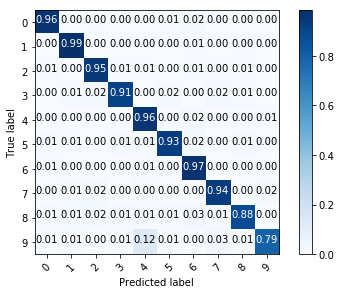

In [24]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test[1], np.concatenate(prediction))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[str(i) for i in range(10)],
                      title='', normalize=True)
plt.show()